# 과제2-악성 종양 진단 예측

![](https://github.com/DA4BAM/image/blob/main/%EC%A2%85%EC%96%91%20%EC%A7%84%EB%8B%A8.png?raw=true)

# 1.환경준비


## (1) 라이브러리

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # 평균=0, 표준편차=1로 맞춰줌

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *

## (2) 데이터 준비

* 종양 진단 데이터

In [ ]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/wisc_bc_data.csv'
data = pd.read_csv(path)
data.drop('id', axis = 1, inplace = True)

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


# 2.데이터 준비

## (1) 데이터 분할
* x, y

In [ ]:
target = 'diagnosis'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* train, validation 분할

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 20) # 테스트 데이터를 0.3, 즉 7:3으로 분할

## (2) 스케일링
* 스케일링이 필요한 ML알고리즘이 있습니다.(KNN, NeuralNet)
* x를 대상으로 스케일링 수행

In [ ]:
# 스케일러 선언
scaler = StandardScaler()

# 생성 및 적용
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

# (옵션) 데이터프레임으로 변환
x_cols = list(x) # x의 칼럼이름들(feature 이름들)
x_train = pd.DataFrame(x_train, columns=x_cols)
x_val = pd.DataFrame(x_val, columns=x_cols)

In [ ]:
x_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,...,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,3.347406e-16,-3.302774e-16,-3.258142e-16,2.231604e-17,-1.111339e-15,4.016887e-17,2.231604e-16,2.320868e-16,-9.997586e-16,8.301567e-16,...,1.026538e-16,3.570567e-17,1.026538e-16,8.926416e-17,4.641736e-16,8.033775e-17,8.926416e-17,-1.651387e-16,-3.927623e-16,7.810614e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,...,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.998897e+00,-2.274308e+00,-1.964167e+00,-1.430800e+00,-3.145507e+00,-1.619725e+00,-1.156553e+00,-1.311335e+00,-2.716985e+00,-1.842684e+00,...,-1.704932e+00,-2.244605e+00,-1.683439e+00,-1.203088e+00,-2.740753e+00,-1.471646e+00,-1.325225e+00,-1.770704e+00,-2.139860e+00,-1.619812e+00
25%,-6.793208e-01,-7.371216e-01,-6.904967e-01,-6.592289e-01,-7.053237e-01,-7.653789e-01,-7.808265e-01,-7.736155e-01,-7.186554e-01,-6.566365e-01,...,-6.664387e-01,-7.287347e-01,-6.828197e-01,-6.393966e-01,-6.892574e-01,-7.046887e-01,-7.701164e-01,-7.819312e-01,-6.218635e-01,-6.865642e-01
50%,-2.138629e-01,-8.803419e-02,-2.213908e-01,-2.895135e-01,-1.861411e-02,-1.669937e-01,-2.917369e-01,-3.481159e-01,-5.550458e-02,-1.615308e-01,...,-2.572108e-01,-6.283919e-02,-2.797046e-01,-3.342607e-01,1.160478e-02,-2.702412e-01,-1.945828e-01,-2.252272e-01,-1.312770e-01,-2.182077e-01
75%,4.846782e-01,5.795304e-01,5.060379e-01,3.522206e-01,6.405706e-01,4.871715e-01,5.603564e-01,7.151391e-01,5.357383e-01,4.697634e-01,...,5.113768e-01,6.685340e-01,5.349933e-01,3.246313e-01,6.185820e-01,5.803945e-01,5.312022e-01,8.096230e-01,4.188695e-01,4.171524e-01
max,3.988719e+00,3.411912e+00,4.004997e+00,5.259695e+00,4.672254e+00,4.026114e+00,4.246410e+00,3.988805e+00,4.314011e+00,4.705400e+00,...,4.075670e+00,3.935829e+00,4.282396e+00,5.862138e+00,3.688402e+00,5.018056e+00,4.553364e+00,2.560559e+00,5.811403e+00,6.508319e+00


# 3.모델링
* 로지스틱 회귀 알고리즘으로 모델링을 해 봅시다.

## (1) 로지스틱 회귀

* 모델링 함수 : LogisticRegression()

### 1) 학습

In [ ]:
# 모델 선언 ----------------
model1 = LogisticRegression()

# 학습 ----------------
model1.fit(x_train, y_train)

LogisticRegression()

### 2) 검증

In [ ]:
# 예측 ----------------
pred1 = model1.predict(x_val)

In [ ]:
pred1

array(['M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B'], dtype=object)

In [ ]:
# 평가 : 정확도(accuracy_score) ----------------
accuracy_score(y_val, pred1)

0.9649122807017544

# 4.모델링 : 추가 알고리즘
* 여러 알고리즘으로 모델을 생성해 보려고 합니다.
    * 의사결정 나무
    * KNN
    * Random Forest

## (1) 의사결정 나무

* 모델링 함수 : DecisionTreeClassifier()

### 1) 학습

In [ ]:
# 모델 선언 ----------------
model2 = DecisionTreeClassifier()

# 학습 ----------------
model2.fit(x_train, y_train)

DecisionTreeClassifier()

### 2) 검증

In [ ]:
# 예측 ----------------
pred2 = model2.predict(x_val)

In [ ]:
# 평가 : 정확도(accuracy_score) ----------------
accuracy_score(y_val, pred2)

0.9005847953216374

## (2) Random Forest

### 1) 학습

In [ ]:
# 모델 선언 ----------------
model3 = RandomForestClassifier() # tree 개수 기본값 100

# 학습 ----------------
model3.fit(x_train, y_train)

RandomForestClassifier()

### 2) 검증

In [ ]:
# 예측 ----------------
pred3 = model3.predict(x_val)

In [ ]:
# 평가 : 정확도(accuracy_score) ----------------
accuracy_score(y_val, pred3)

0.935672514619883

## (3) KNN

### 1) 학습

In [ ]:
# 모델 선언 ----------------
model4 = KNeighborsClassifier() # k 기본값 5

# 학습 ----------------
model4.fit(x_train, y_train)

KNeighborsClassifier()

### 2) 검증

In [ ]:
# 예측 ----------------
pred4 = model4.predict(x_val)

In [ ]:
# 평가 : 정확도(accuracy_score) ----------------
accuracy_score(y_val, pred4)

0.9473684210526315

## (4) Neural Net(Deep Learning)

### 1) 학습

In [ ]:
x_train.shape #행,열(feature 수, 정보 수)

(398, 30)

In [ ]:
# 모델 선언 ----------------
model5 = MLPClassifier(hidden_layer_sizes = (50, 50))  # k 기본값 (100,100)

# 학습 ----------------
model5.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 50))

### 2) 검증

In [ ]:
# 예측 ----------------
pred5 = model5.predict(x_val)

In [ ]:
# 평가 : 정확도(accuracy_score) ----------------
accuracy_score(y_val, pred5)

0.9707602339181286

# 5.추가
* 다음 사항은 시간이 가용한 만큼만 진행합니다.
    * 의사결정 나무 시각화
    * Random Forest 변수 중요도
    * KNN 성능튜닝

## (1) 모델 시각화
* 시각화가 가능한 모델이 있습니다.
* 대표적인 모델이 의사결정나무!

In [ ]:
model6 = DecisionTreeClassifier(max_depth = 2)
model6.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
# 시각화 함수
from sklearn.tree import plot_tree

# target class name
cn = ['B', 'M']

# feature name
fn = list(x_train)

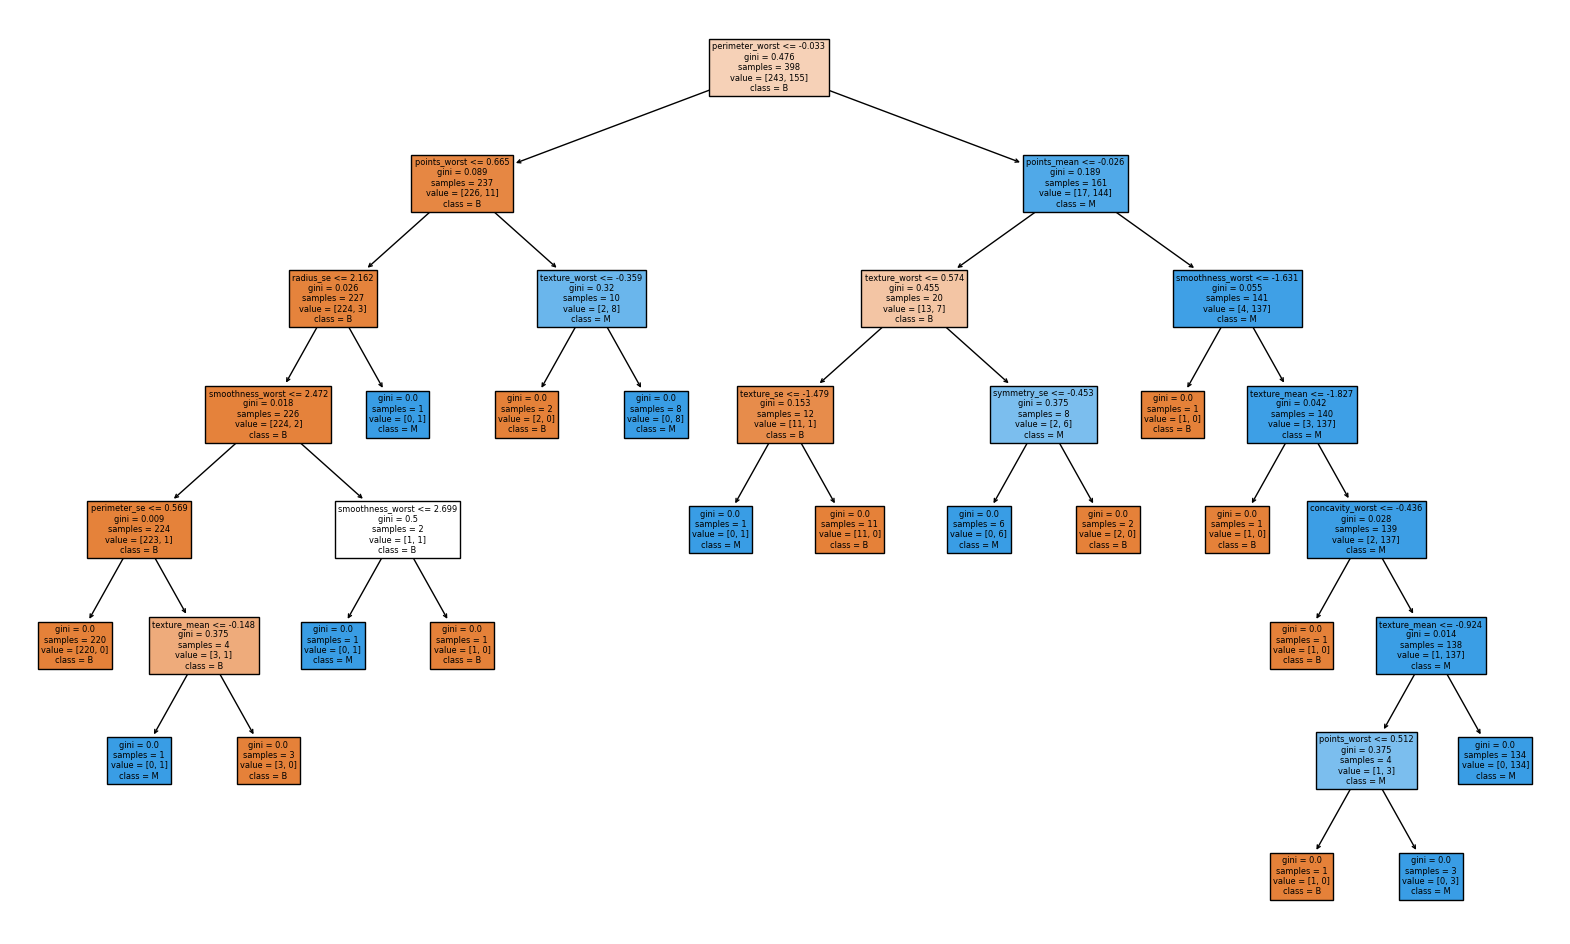

In [ ]:
# 트리 모델 시각화
plt.figure(figsize = (20,12)) # 그림 사이즈 조절
plot_tree(model2, feature_names = fn, class_names= cn, filled = True);

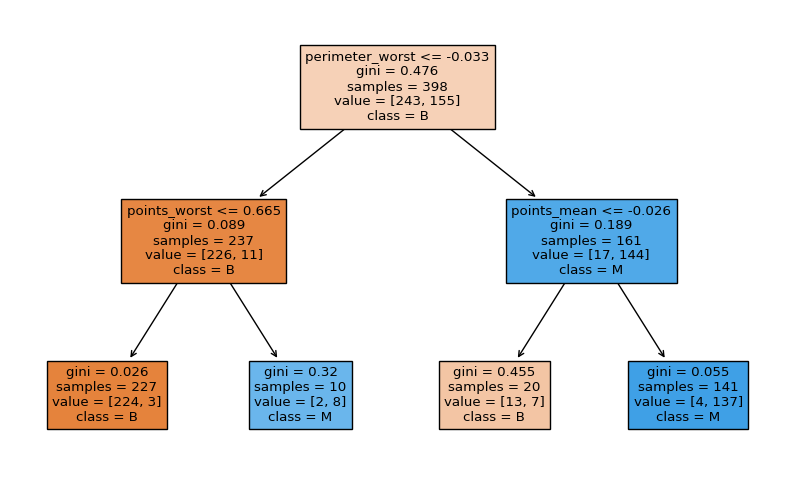

In [ ]:
# 트리 모델 시각화
plt.figure(figsize = (10,6)) # 그림 사이즈 조절
plot_tree(model6, feature_names = fn, class_names= cn, filled = True);

## (2) 변수중요도 구하기

* 변수중요도
    * tree 기반 알고리즘들은 변수중요도를 제공합니다.(모든 알고리즘이 변수중요도를 제공하지는 않습니다.)
    * RandomForest 라는 알고리즘으로 부터 변수중요도를 뽑아봅시다.

In [ ]:
model3.feature_importances_

array([0.04813746, 0.00803684, 0.03142563, 0.03530542, 0.00739527,
       0.01139828, 0.0456326 , 0.10603737, 0.00302667, 0.00401745,
       0.01488453, 0.00407318, 0.00868472, 0.04586874, 0.00214862,
       0.0035515 , 0.00450358, 0.00385266, 0.00337271, 0.00564696,
       0.07428182, 0.01238343, 0.17984573, 0.121582  , 0.01514815,
       0.01413083, 0.04248468, 0.12656538, 0.01119519, 0.00538262])

* 변수 중요도 그래프

In [ ]:
# 아래 함수는 내용을 이해하려고 하기 보다, 사용하는데 집중합시다.
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

이제 그래프를 그려봅시다.

In [ ]:
x_cols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'points_mean',
 'symmetry_mean',
 'dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'points_se',
 'symmetry_se',
 'dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'points_worst',
 'symmetry_worst',
 'dimension_worst']

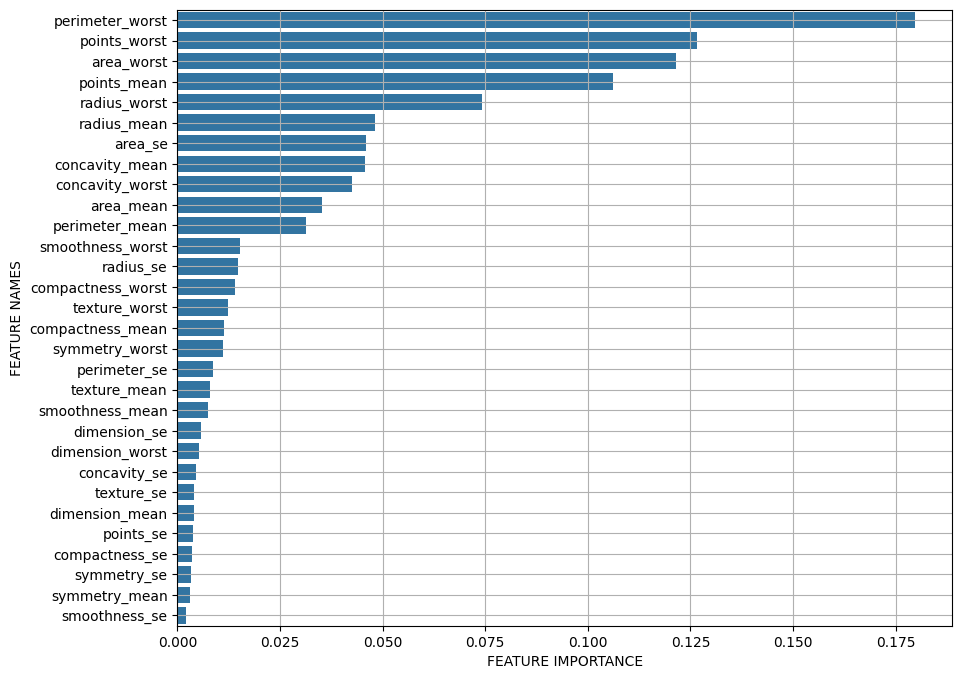

In [ ]:
result = plot_feature_importance(model3.feature_importances_, x_cols)

어디까지가 중요한 변수 일까요?

## (3) 성능 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

### 1) Decision Tree
* max_depth를 1~20 늘려가며 성능 측정

In [ ]:
# 1. 하이퍼파라미터 범위 지정 1-20까지의 자연수
params = {'max_depth':range(1,21)}

# 2. 튜닝을 위한 모델 선언
model2 = GridSearchCV(DecisionTreeClassifier(), params, cv = 5)

# 3. 학습(튜닝)
model2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 21)})

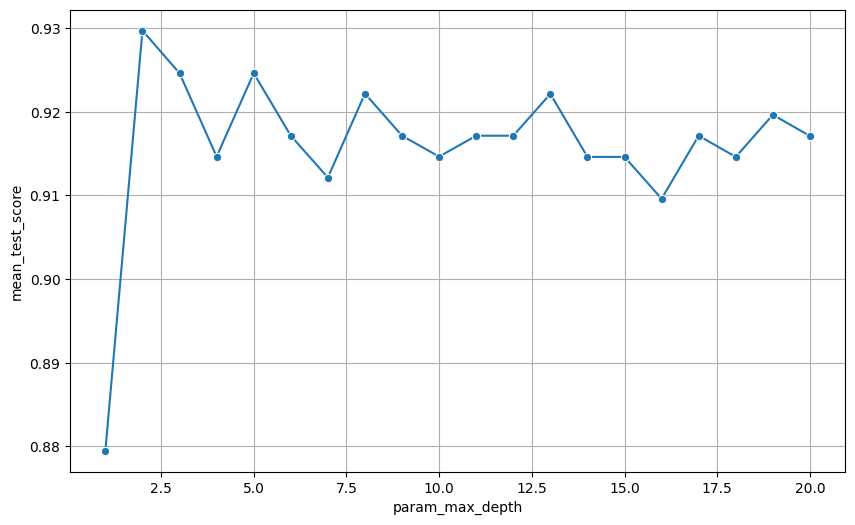

In [ ]:
# 4. 튜닝 결과 시각화
result = pd.DataFrame(model2.cv_results_)
plt.figure(figsize = (10,6))
sns.lineplot(x= 'param_max_depth', y = 'mean_test_score', data = result, marker = 'o')
plt.grid()
plt.show()

### 2) Random Forest
* tree의 수 : 20 ~ 400
* 시간이 좀 걸립니다.

In [ ]:
# 1. 하이퍼파라미터 범위 지정 20에서 400까지 20씩 증가
params = {'n_estimators':range(20, 401, 20)}

# 2. 튜닝을 위한 모델 선언
model3 = GridSearchCV(RandomForestClassifier(), params, cv = 5)

# 3. 학습(튜닝)
model3.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(20, 401, 20)})

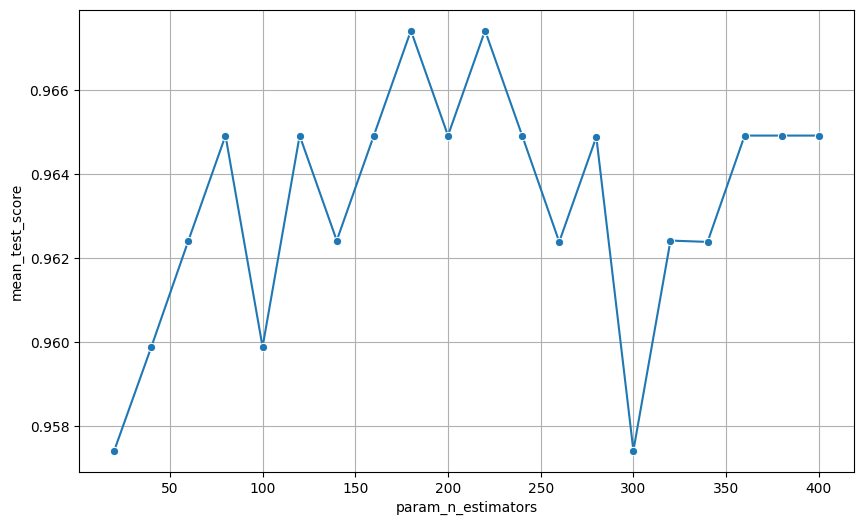

In [ ]:
# 4. 튜닝 결과 시각화
result = pd.DataFrame(model3.cv_results_)
plt.figure(figsize = (10,6))
sns.lineplot(x= 'param_n_estimators', y = 'mean_test_score', data = result, marker = 'o')
plt.grid()
plt.show()

### 3) KNN
* k의 수 : 3 ~ 50

In [ ]:
# range(시작값, 끝값, 증가값) - 끝값은 포함 안됨

In [ ]:
# 1. 하이퍼파라미터 범위 지정
params = {'n_neighbors':range(1, 51), 'metric':['euclidean', 'manhattan']}

# 2. 튜닝을 위한 모델 선언
model4 = GridSearchCV(KNeighborsClassifier(), params, cv = 5)

# 3. 학습(튜닝)
model4.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(1, 51)})

In [ ]:
model4.best_params_

{'metric': 'manhattan', 'n_neighbors': 3}

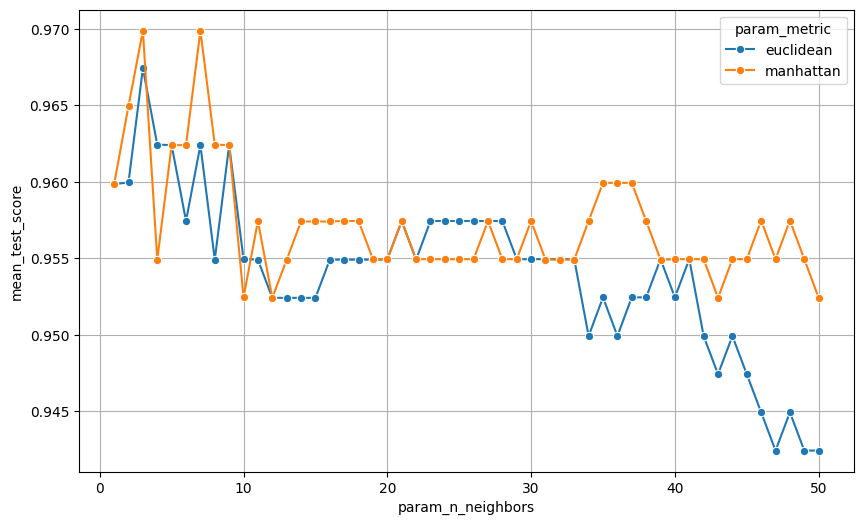

In [ ]:
# 4. 튜닝 결과 시각화
result = pd.DataFrame(model4.cv_results_)
plt.figure(figsize = (10,6))
sns.lineplot(x= 'param_n_neighbors', y = 'mean_test_score', data = result, marker = 'o', hue = 'param_metric')
plt.grid()
plt.show()

### 4) Neural Net
* hidden_layer_sizes : (10), (50), (100), (50, 50), (50, 50, 50), (50, 50, 50, 50)

In [ ]:
# 1. 하이퍼파라미터 범위 지정
params = {'hidden_layer_sizes':[(10), (50), (100), (50, 50), (50, 50, 50), (50, 50, 50, 50)]}

# 2. 튜닝을 위한 모델 선언
model5 = GridSearchCV(MLPClassifier(), params, cv = 5)

# 3. 학습(튜닝)
model5.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [10, 50, 100, (50, 50),
                                                (50, 50, 50),
                                                (50, 50, 50, 50)]})

In [ ]:
model5.best_params_

{'hidden_layer_sizes': (50, 50)}